# Q2cd   
先计算与首次水肿/血肿体积的关系

In [1]:
import pandas as pd

In [59]:
tab_1 = pd.read_excel("../../metadata/表1-患者列表及临床信息.xlsx")
tab_1 = tab_1.rename(columns={'Unnamed: 0': 'ID'})

In [60]:
tab_1

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,饮酒史,发病到首次影像检查时间间隔,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,0,2.5,180/90,0,1,1,1,1,1,1
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,0,3.0,199/120,0,1,1,1,0,1,1
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,0,2.0,199/120,0,1,1,1,1,1,1
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,0,1.0,186/99,0,1,1,1,0,0,0
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,0,5.0,135/92,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,0,5.5,202/100,0,1,1,1,0,1,1
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,0,0.5,180/110,1,0,1,1,1,1,1
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,0,2.8,233/135,0,1,1,1,1,1,1
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,1,3.0,183/122,0,1,1,1,1,1,1


In [72]:
tab_1_100 = tab_1[:100]

In [255]:
# tab_1_100["ed"] = 0
# tab_1_100["hm"] = 0
tab_1_100

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,ed,hm
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,180/90,0,1,1,1,1,1,1,0,1
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,199/120,0,1,1,1,0,1,1,2,1
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,199/120,0,1,1,1,1,1,1,1,0
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,186/99,0,1,1,1,0,0,0,2,2
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,135/92,0,1,1,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,4.0,训练,20180802001789,93,女,0,0,0,0,...,181/76,0,0,0,1,1,1,1,2,1
96,sub097,2.0,训练,20181010000767,83,女,0,1,0,0,...,170/79,0,1,1,1,1,1,1,2,3
97,sub098,5.0,训练,20180612002507,82,男,0,1,1,1,...,200/100,0,1,1,1,1,1,1,2,1
98,sub099,3.0,训练,20180620002296,53,男,0,1,0,0,...,159/91,1,1,1,1,1,1,1,1,0


## 读入水肿/血肿进展标签

In [105]:
ed_label = pd.read_pickle("data/best_3_cluster_members.pkl")

In [117]:
for label in ed_label:
    # 对于每一类 label，把原来的数值填上
    num = label[0]
    person = ed_label[label]
    for person_id in person:
        tab_1_100.loc[(tab_1_100["ID"] == person_id), "ed"] = int(num)

In [243]:
hm_label = pd.read_pickle("data/best_4_cluster_members_HM.pkl")

In [254]:
for label in hm_label:
    # 对于每一类 label，把原来的数值填上
    num = label[0]
    person = hm_label[label]
    for person_id in person:
        tab_1_100.loc[(tab_1_100["ID"] == person_id), "hm"] = int(num)

## 治疗方案的分布情况    
假设医生在实施治疗方案时已经充分考虑了患者的临床特征

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

In [90]:
%matplotlib inline

In [87]:
remedy_cnts = dict()
for remedy in ["脑室引流","止血治疗","降颅压治疗","降压治疗","镇静、镇痛治疗","止吐护胃","营养神经"]:
    remedy_cnts[remedy] = tab_1_100[remedy].sum()

In [88]:
remedy_cnts

{'脑室引流': 6,
 '止血治疗': 79,
 '降颅压治疗': 76,
 '降压治疗': 92,
 '镇静、镇痛治疗': 85,
 '止吐护胃': 97,
 '营养神经': 96}

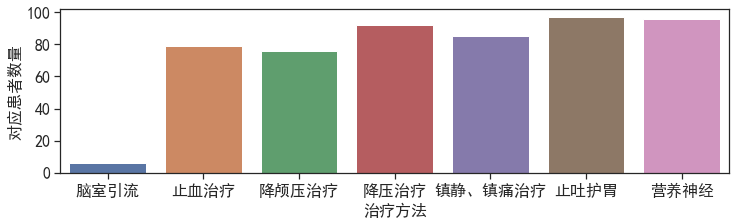

In [103]:
# 条形图可视化
plt.close()

plt.figure(figsize=(12, 3))

sns.barplot(x=list(remedy_cnts.keys()), y=[remedy_cnts[remedy] for remedy in remedy_cnts])

# 添加标题和标签
plt.xlabel('治疗方法', fontsize=16)
plt.ylabel('对应患者数量', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 显示图形
plt.savefig('img/不同治疗方案的使用数目.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
combined_values = tab_1_100[["脑室引流","止血治疗","降颅压治疗","降压治疗","镇静、镇痛治疗","止吐护胃","营养神经"]].drop_duplicates()

In [77]:
grouped_remedy = tab_1_100.groupby(["脑室引流","止血治疗","降颅压治疗","降压治疗","镇静、镇痛治疗","止吐护胃","营养神经"])

In [78]:
combined_values["counts"] = 0

In [122]:
from collections import Counter

In [126]:
# 只用跑一遍
# combined_values["ed_0"] = 0
# combined_values["ed_1"] = 0
# combined_values["ed_2"] = 0

In [246]:
# 只用跑一遍
# combined_values["hm_0"] = 0
# combined_values["hm_1"] = 0
# combined_values["hm_2"] = 0
# combined_values["hm_3"] = 0

In [307]:
tmp_patient.columns

Index(['ID', '90天mRS', '数据集划分', '入院首次影像检查流水号', '年龄', '性别', '脑出血前mRS评分',
       '高血压病史', '卒中病史', '糖尿病史', '房颤史', '冠心病史', '吸烟史', '饮酒史', '发病到首次影像检查时间间隔',
       '血压', '脑室引流', '止血治疗', '降颅压治疗', '降压治疗', '镇静、镇痛治疗', '止吐护胃', '营养神经', 'ed',
       'hm'],
      dtype='object')

In [320]:
tmp_patient[tmp_patient["ed"] == 0]["房颤史"].mean()

0.0

In [321]:
tmp_patient[tmp_patient["ed"] == 1]["房颤史"].mean()

0.0

In [322]:
tmp_patient[tmp_patient["ed"] == 2]["房颤史"].mean()

0.08333333333333333

In [291]:
tmp_patient = None
# 补充水肿类别数量
for name, group in grouped_remedy:
    # print(name)
    # print(group.shape)
    
    if name == (0,1,1,1,1,1,1):
        tmp_patient = tab_1_100.loc[(tab_1_100["脑室引流"]==name[0]) & (tab_1_100["止血治疗"]==name[1]) & (tab_1_100["降颅压治疗"]==name[2]) & (tab_1_100["降压治疗"]==name[3]) & (tab_1_100["镇静、镇痛治疗"]==name[4]) & (tab_1_100["止吐护胃"]==name[5]) & (tab_1_100["营养神经"]==name[6])]
        
    val = tab_1_100.loc[(tab_1_100["脑室引流"]==name[0]) & (tab_1_100["止血治疗"]==name[1]) & (tab_1_100["降颅压治疗"]==name[2]) & (tab_1_100["降压治疗"]==name[3]) & (tab_1_100["镇静、镇痛治疗"]==name[4]) & (tab_1_100["止吐护胃"]==name[5]) & (tab_1_100["营养神经"]==name[6])]["ed"]
    ed_counter = Counter(val.tolist())
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "ed_0"] = ed_counter[0]
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "ed_1"] = ed_counter[1]
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "ed_2"] = ed_counter[2]
    print(val.tolist())

[2, 2, 1, 2, 2]
[2, 1, 1, 0, 0, 2]
[0]
[0, 1]
[0, 2, 2, 0, 0]
[2]
[0]
[2]
[2, 0, 2, 1, 1, 2, 1, 2]
[2, 2]
[2]
[1]
[2, 1, 2, 0, 2]
[0]
[0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2]
[2]
[0]
[1, 2, 2, 1]


In [256]:
# 补充血肿类别数量
for name, group in grouped_remedy:
    # print(name)
    # print(group.shape)
    val = tab_1_100.loc[(tab_1_100["脑室引流"]==name[0]) & (tab_1_100["止血治疗"]==name[1]) & (tab_1_100["降颅压治疗"]==name[2]) & (tab_1_100["降压治疗"]==name[3]) & (tab_1_100["镇静、镇痛治疗"]==name[4]) & (tab_1_100["止吐护胃"]==name[5]) & (tab_1_100["营养神经"]==name[6])]["hm"]
    hm_counter = Counter(val.tolist())
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "hm_0"] = hm_counter[0]
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "hm_1"] = hm_counter[1]
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "hm_2"] = hm_counter[2]
    combined_values.loc[(combined_values["脑室引流"]==name[0]) & (combined_values["止血治疗"]==name[1]) & (combined_values["降颅压治疗"]==name[2]) & (combined_values["降压治疗"]==name[3]) & (combined_values["镇静、镇痛治疗"]==name[4]) & (combined_values["止吐护胃"]==name[5]) & (combined_values["营养神经"]==name[6]), "hm_3"] = hm_counter[3]
    print(val.tolist())

[2, 1, 3, 1, 1]
[3, 0, 0, 2, 2, 1]
[2]
[1, 3]
[1, 1, 1, 0, 2]
[1]
[0]
[1]
[1, 2, 2, 3, 3, 1, 0, 1]
[0, 1]
[2]
[3]
[1, 0, 1, 2, 1]
[2]
[1, 0, 0, 0, 2, 0, 1, 2, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 0, 1, 3, 3, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3]
[1]
[0]
[3, 1, 2, 0]


In [257]:
sorted_combined_values = combined_values.sort_values(by='counts', ascending=False)
# 定义新索引
new_index = list('ABCDEFGHIJKLMNOPQR')
sorted_combined_values = sorted_combined_values.set_index(pd.Index(new_index))

In [258]:
sorted_combined_values

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,counts,ed_0,ed_1,ed_2,hm_0,hm_1,hm_2,hm_3
A,0,1,1,1,1,1,1,54,18,12,24,7,24,11,12
B,0,1,0,1,1,1,1,8,1,3,4,1,3,2,2
C,0,0,0,1,1,1,1,6,2,2,2,2,1,2,1
D,0,0,0,0,1,1,1,5,0,1,4,0,3,1,1
E,0,0,1,1,1,1,1,5,3,0,2,1,3,1,0
F,0,1,1,1,0,1,1,5,1,1,3,1,3,1,0
G,1,1,1,1,1,1,1,4,0,2,2,1,1,1,1
H,0,1,1,0,0,1,1,2,0,0,2,1,1,0,0
I,0,0,1,1,0,1,1,2,1,1,0,0,1,0,1
J,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0


In [273]:
sorted_combined_values.to_excel("remedy_counts.xlsx", index=False)

In [136]:
sorted_combined_values["counts"].tolist()

[54, 8, 6, 5, 5, 5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
sorted_combined_values["counts"].describe()

count    18.000000
mean      5.555556
std      12.291663
min       1.000000
25%       1.000000
50%       1.500000
75%       5.000000
max      54.000000
Name: counts, dtype: float64

In [ ]:
combined_values["counts"].describeribe()

count    28.000000
mean      5.714286
std      11.414277
min       1.000000
25%       1.000000
50%       2.000000
75%       5.500000
max      61.000000
Name: counts, dtype: float64

In [ ]:
["counts"] = group.shape[0]

In [185]:
# 生成水肿桑基图数据
source_ed = []
target_ed = []
val_ed = []
for i, data in sorted_combined_values.iterrows():
    # 序号：ord(i)-65
    
    idx = ord(i)-65
    
    if data.ed_0 > 0:
        source_ed.append(ord(i)-65)
        target_ed.append(20)
        val_ed.append(data.ed_0)
    
    if data.ed_1 > 0:
        source_ed.append(ord(i)-65)
        target_ed.append(19)
        val_ed.append(data.ed_1)
    
    if data.ed_2 > 0:
        source_ed.append(ord(i)-65)
        target_ed.append(18)
        val_ed.append(data.ed_2)

In [259]:
# 生成血肿桑基图数据
source_hm = []
target_hm = []
val_hm = []
for i, data in sorted_combined_values.iterrows():
    # 序号：ord(i)-65
    
    idx = ord(i)-65
    
    if data.hm_0 > 0:
        source_hm.append(ord(i)-65)
        target_hm.append(21)
        val_hm.append(data.hm_0)
    
    if data.hm_1 > 0:
        source_hm.append(ord(i)-65)
        target_hm.append(20)
        val_hm.append(data.hm_1)
    
    if data.hm_2 > 0:
        source_hm.append(ord(i)-65)
        target_hm.append(19)
        val_hm.append(data.hm_2)
        
    if data.hm_2 > 0:
        source_hm.append(ord(i)-65)
        target_hm.append(18)
        val_hm.append(data.hm_2)

In [262]:
sorted_combined_values

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,counts,ed_0,ed_1,ed_2,hm_0,hm_1,hm_2,hm_3
A,0,1,1,1,1,1,1,54,18,12,24,7,24,11,12
B,0,1,0,1,1,1,1,8,1,3,4,1,3,2,2
C,0,0,0,1,1,1,1,6,2,2,2,2,1,2,1
D,0,0,0,0,1,1,1,5,0,1,4,0,3,1,1
E,0,0,1,1,1,1,1,5,3,0,2,1,3,1,0
F,0,1,1,1,0,1,1,5,1,1,3,1,3,1,0
G,1,1,1,1,1,1,1,4,0,2,2,1,1,1,1
H,0,1,1,0,0,1,1,2,0,0,2,1,1,0,0
I,0,0,1,1,0,1,1,2,1,1,0,0,1,0,1
J,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0


In [270]:
# 生成血肿水肿桑基图数据
source_all = []
target_all = []
val_all = []

# 先生成治疗方案到血肿
for i, data in sorted_combined_values.iterrows():
    # 序号：ord(i)-65
    
    idx = ord(i)-65
    
    if data.hm_0 > 0:
        source_all.append(ord(i)-65)
        target_all.append(21)
        val_all.append(data.hm_0)
    
    if data.hm_1 > 0:
        source_all.append(ord(i)-65)
        target_all.append(20)
        val_all.append(data.hm_1)
    
    if data.hm_2 > 0:
        source_all.append(ord(i)-65)
        target_all.append(19)
        val_all.append(data.hm_2)
        
    if data.hm_3 > 0:
        source_all.append(ord(i)-65)
        target_all.append(18)
        val_all.append(data.hm_2)

# 再生成血肿到水肿

ed_sankey_dict = {2:22, 1:23, 0:24}
hm_sankey_dict = {3:18, 2:19, 1:20, 0:21}

for i in range(4): # 对应血肿 0123 （下面的排序是：优良中差）
    for j in range(3): # 对应水肿 012（下面的排序是：良中差）
        val = tab_1_100.loc[(tab_1_100["hm"] == i) & (tab_1_100["ed"] == j)].shape[0]
        if val > 0:
            source_all.append(hm_sankey_dict[i])
            target_all.append(ed_sankey_dict[j])
            val_all.append(val)

In [271]:
val_all

[7,
 24,
 11,
 11,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 5,
 9,
 2,
 11,
 32,
 14,
 8,
 14,
 5]

### 桑基图可视化水肿体积进展

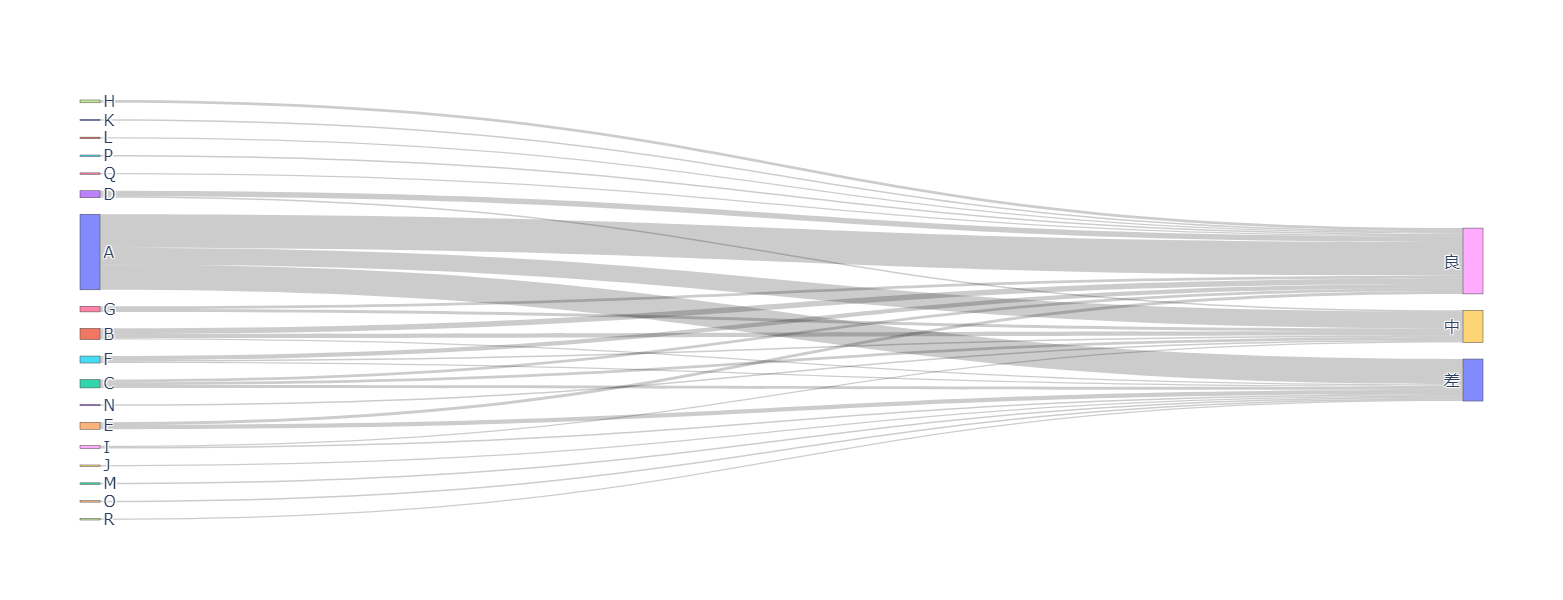

In [186]:
import plotly.graph_objects as go

# 示例数据
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', '良', '中', '差']
source = source_ed
target = target_ed
value = val_ed
# 创建桑基图
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=labels,
        # arrangement='perpendicular'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

fig.update_layout(
    width=1000,  # 设置宽度为800像素
    height=600,  # 设置高度为600像素
    font_size=16
)

# 显示图形
# fig.write_image("img/ed_sankey.pdf")
fig.show()

### 桑基图可视化血肿体积进展

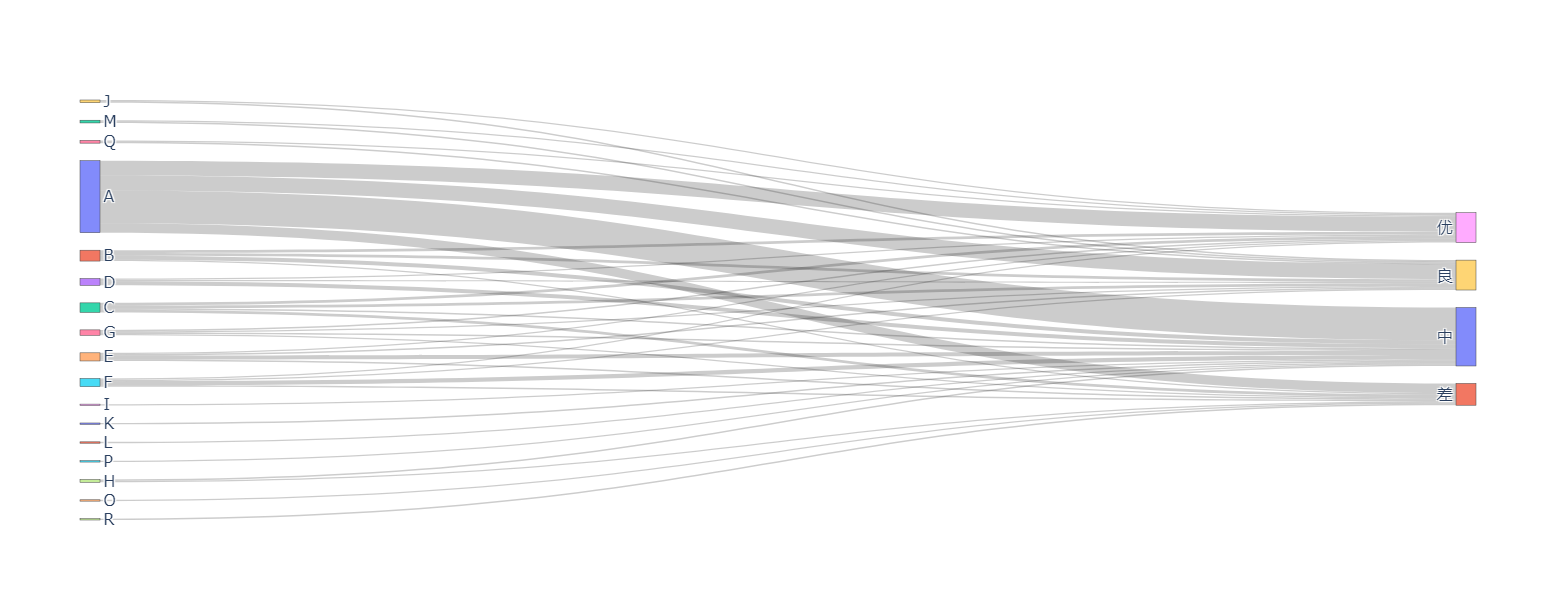

In [260]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', '优', '良', '中', '差']
source = source_hm
target = target_hm
value = val_hm
# 创建桑基图
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=labels,
        # arrangement='perpendicular'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

fig.update_layout(
    width=1000,  # 设置宽度为800像素
    height=600,  # 设置高度为600像素
    font_size=16
)

# 显示图形
# fig.write_image("img/ed_sankey.pdf")
fig.show()

### 桑基图可视化血肿/水肿体积进展

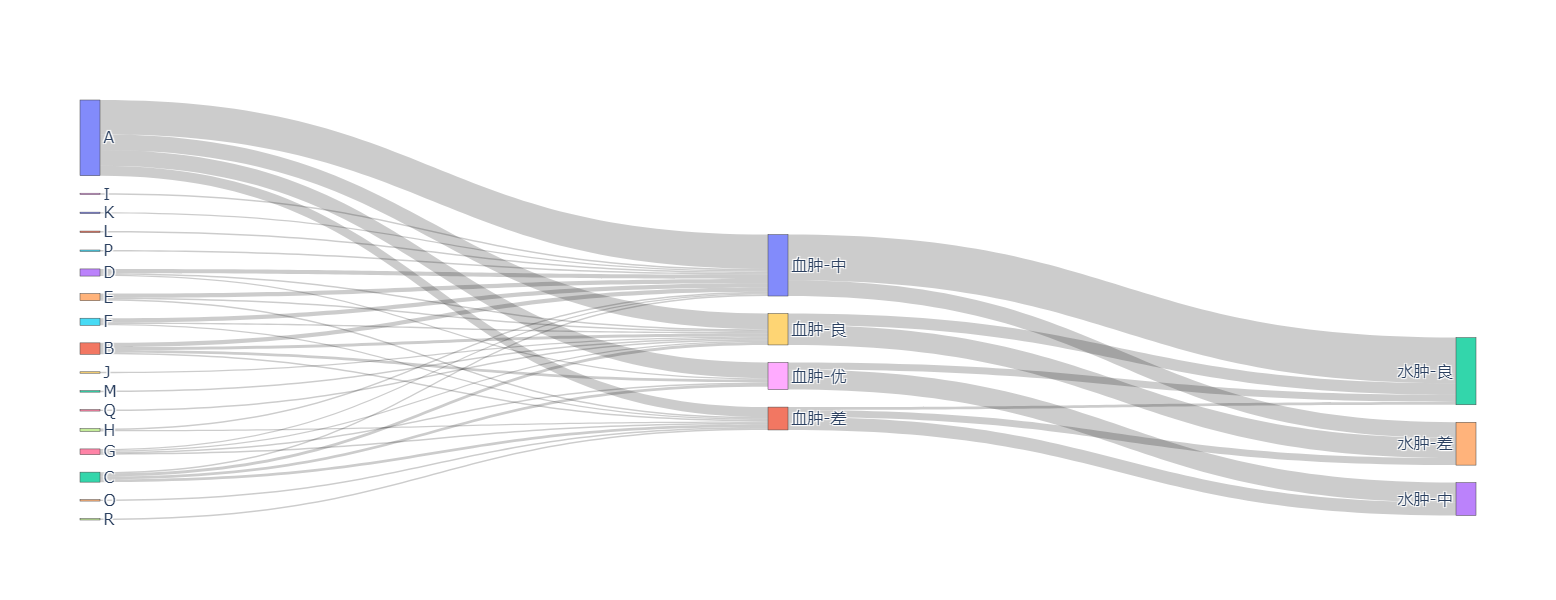

In [272]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', '血肿-优', '血肿-良', '血肿-中', '血肿-差', '水肿-良', '水肿-中', '水肿-差']
source = source_all
target = target_all
value = val_all
# 创建桑基图
fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=labels,
        # arrangement='perpendicular'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

fig.update_layout(
    width=1000,  # 设置宽度为800像素
    height=600,  # 设置高度为600像素
    font_size=16
)

# 显示图形
# fig.write_image("img/ed_sankey.pdf")
fig.show()

## 水肿体积相关性分析

In [177]:
tab_1_100.head()

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,ed,hm
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,180/90,0,1,1,1,1,1,1,0,0
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,199/120,0,1,1,1,0,1,1,2,0
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,199/120,0,1,1,1,1,1,1,1,0
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,186/99,0,1,1,1,0,0,0,2,0
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,135/92,0,1,1,0,0,1,1,2,0


In [204]:
# 要把数据类型换成 int，不然默认 object 算不了 corr
tab_1_100['ed'] = tab_1_100['ed'].astype(int)

/tmp/ipykernel_78155/2068494105.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [277]:
pearson_corr = tab_1_100["ed"].corr(tab_1_100["脑室引流"])

In [278]:
correlation_matrix = tab_1_100.corr()

In [279]:
correlation_matrix

,90天mRS,入院首次影像检查流水号,年龄,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,房颤史,冠心病史,吸烟史,...,发病到首次影像检查时间间隔,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,ed,hm
90天mRS,1.000000,0.101548,0.233561,0.058260,0.090089,0.067648,0.313328,0.155620,0.313127,-0.205370,...,0.138745,0.201444,-0.060480,0.164959,0.159672,0.148310,-0.070460,0.019434,-0.036080,-0.312184
入院首次影像检查流水号,0.101548,1.000000,0.039053,-0.087409,0.087079,-0.045510,0.065783,0.064955,0.241289,0.149792,...,-0.101704,0.110253,-0.138655,-0.087694,0.016170,0.630219,0.260508,0.304084,0.014354,0.040750
年龄,0.233561,0.039053,1.000000,-0.007503,-0.188249,0.196340,0.108256,0.267706,0.341695,-0.083961,...,-0.057425,-0.070733,-0.388495,-0.245819,-0.112105,-0.042445,-0.010136,-0.046221,0.222030,-0.053750
脑出血前mRS评分,0.058260,-0.087409,-0.007503,1.000000,0.071361,0.399005,0.169771,-0.044334,-0.060773,0.070606,...,0.042349,-0.048823,0.099634,0.033182,0.056985,-0.099220,-0.343626,-0.289273,0.074078,0.177455
高血压病史,0.090089,0.087079,-0.188249,0.071361,1.000000,0.178848,0.085200,-0.056478,0.008602,0.100406,...,0.068248,0.093296,-0.039287,-0.135461,0.004537,0.103418,0.115452,-0.075378,0.072922,-0.149304
卒中病史,0.067648,-0.045510,0.196340,0.399005,0.178848,1.000000,0.187974,0.122807,0.114902,0.090318,...,-0.093960,-0.015027,-0.125792,-0.265003,-0.045101,-0.082096,-0.064254,-0.291382,0.052410,0.016770
糖尿病史,0.313328,0.065783,0.108256,0.169771,0.085200,0.187974,1.000000,0.018322,0.229769,0.120113,...,0.057979,-0.002242,-0.028105,0.191988,0.133456,0.115561,0.079590,-0.043473,-0.089371,0.014230
房颤史,0.155620,0.064955,0.267706,-0.044334,-0.056478,0.122807,0.018322,1.000000,0.569167,0.005848,...,-0.053061,-0.057961,-0.107017,0.021487,0.067651,-0.032125,0.040346,0.046829,0.007995,-0.245256
冠心病史,0.313127,0.241289,0.341695,-0.060773,0.008602,0.114902,0.229769,0.569167,1.000000,-0.063241,...,-0.071840,0.067682,-0.181016,-0.068727,-0.036064,0.132110,0.055306,0.064194,-0.062103,-0.285913
吸烟史,-0.205370,0.149792,-0.083961,0.070606,0.100406,0.090318,0.120113,0.005848,-0.063241,1.000000,...,-0.009308,-0.122362,0.187124,-0.085947,0.142819,0.060680,0.085174,-0.031220,0.052410,0.252592


In [206]:
tab_1_100["ed"].dtype

dtype('int64')

### One-Hot+LR   
每种治疗方案相当于是一种治疗特征，进展模式0~2做回归

In [280]:
tab_1_100[["脑室引流","止血治疗","降颅压治疗","降压治疗","镇静、镇痛治疗","止吐护胃","营养神经","ed","hm"]]

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,ed,hm
0,0,1,1,1,1,1,1,0,1
1,0,1,1,1,0,1,1,2,1
2,0,1,1,1,1,1,1,1,0
3,0,1,1,1,0,0,0,2,2
4,0,1,1,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,1,1,1,2,1
96,0,1,1,1,1,1,1,2,3
97,0,1,1,1,1,1,1,2,1
98,1,1,1,1,1,1,1,1,0


In [221]:
import numpy as np

In [220]:
X_ed = list()
y_ed = list()

for i, data in tab_1_100.iterrows():
    data = list(data)[16:24]
    X_ed.append(data[:7])
    y_ed.append(data[-1])

In [222]:
X_ed_np = np.array(X_ed)
y_ed_np = np.array(y_ed)

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [289]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_ed_np, y_ed_np, test_size=0.2, random_state=42)

logreg = LogisticRegression()

In [238]:
# 使用交叉验证评估模型性能
scores = cross_val_score(logreg, X_ed_np, y_ed_np, cv=5, scoring='r2')

# 交叉验证的结果是负均方误差（Negative Mean Squared Error），需要取其相反数并计算平均值
# mse_scores = -scores
# mean_mse = mse_scores.mean()
mean_r2 = scores.mean()

# print("交叉验证的平均均方误差：", mean_mse)
print("交叉验证的平均R2：", mean_r2)

交叉验证的平均R2： -0.8382618918430096


In [242]:
# 在训练集上训练逻辑回归模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 评估模型性能，使用均方误差（Mean Squared Error）
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("均方误差（MSE）：", mse)
print("R^2：", r2)

# 获取特征系数
feature_coefficients = logreg.coef_

# 打印特征系数
# 这个特征系数有正负，正相关，负相关
for i, coef in enumerate(feature_coefficients[0]):
    print("Feature", i+1, "Coefficient:", coef)

均方误差（MSE）： 2.2
R^2： -1.8947368421052633
Feature 1 Coefficient: -0.15727632185359566
Feature 2 Coefficient: -0.420630459539834
Feature 3 Coefficient: -0.006679604680470564
Feature 4 Coefficient: 0.6587060504484085
Feature 5 Coefficient: -0.07884356827021502
Feature 6 Coefficient: -0.02389653080971312
Feature 7 Coefficient: -0.5770263913956217


In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
# 创建随机森林分类器
rf = RandomForestClassifier()

# 训练模型
rf.fit(X_ed_np, y_ed_np)

# 获取特征重要性得分
importance_scores = rf.feature_importances_

# 打印特征重要性得分
# 范围从 0~1，得分更高地说明重要性更大
for i, score in enumerate(importance_scores):
    print("Feature", i+1, "Importance Score:", score)

Feature 1 Importance Score: 0.13517773512072345
Feature 2 Importance Score: 0.16427232083587628
Feature 3 Importance Score: 0.17453086363959244
Feature 4 Importance Score: 0.18315161862456683
Feature 5 Importance Score: 0.12584484211983185
Feature 6 Importance Score: 0.09825463586137533
Feature 7 Importance Score: 0.1187679837980339


In [241]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("均方误差（MSE）：", mse)
print("R^2：", r2)

均方误差（MSE）： 1.8
R^2： -1.3684210526315792


In [290]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25


## 血肿体积相关性分析

In [274]:
tab_1_100.head()

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,血压,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,ed,hm
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,180/90,0,1,1,1,1,1,1,0,1
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,199/120,0,1,1,1,0,1,1,2,1
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,199/120,0,1,1,1,1,1,1,1,0
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,186/99,0,1,1,1,0,0,0,2,2
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,135/92,0,1,1,0,0,1,1,2,0


In [275]:
# 要把数据类型换成 int，不然默认 object 算不了 corr
tab_1_100['ed'] = tab_1_100['ed'].astype(int)
tab_1_100['hm'] = tab_1_100['hm'].astype(int)

/tmp/ipykernel_78155/3716179394.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_78155/3716179394.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
X_all = list()
y_all = list()

for i, data in tab_1_100.iterrows():
    data = list(data)[16:25]
    X_all.append(data[:7]+[data[8]])
    y_all.append(data[7])
    
X_all_np = np.array(X_all)
y_all_np = np.array(y_all)

In [325]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_all_np, y_all_np, test_size=0.2, random_state=42)

logreg = LogisticRegression()

# 使用交叉验证评估模型性能
scores = cross_val_score(logreg, X_all_np, y_all_np, cv=5, scoring='r2')

mean_r2 = scores.mean()

# print("交叉验证的平均均方误差：", mean_mse)
print("交叉验证的平均R2：", mean_r2)

交叉验证的平均R2： -0.7993760173629951


In [284]:
# 在训练集上训练逻辑回归模型
logreg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = logreg.predict(X_test)

# 评估模型性能，使用均方误差（Mean Squared Error）
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("均方误差（MSE）：", mse)
print("R^2：", r2)

# 获取特征系数
feature_coefficients = logreg.coef_

# 打印特征系数
# 这个特征系数有正负，正相关，负相关
for i, coef in enumerate(feature_coefficients[0]):
    print("Feature", i+1, "Coefficient:", coef)

均方误差（MSE）： 2.4
R^2： -2.1578947368421053
Feature 1 Coefficient: -0.16845595632546848
Feature 2 Coefficient: -0.41664142337193033
Feature 3 Coefficient: 0.005687109385172252
Feature 4 Coefficient: 0.6502561117115022
Feature 5 Coefficient: -0.07872586452021679
Feature 6 Coefficient: -0.026720979841142693
Feature 7 Coefficient: -0.5820247686261698
Feature 8 Coefficient: -0.046611159321099764


In [327]:
# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_all_np, y_all_np)

# 获取特征重要性得分
importance_scores = rf.feature_importances_

# 打印特征重要性得分
# 范围从 0~1，得分更高地说明重要性更大
for i, score in enumerate(importance_scores):
    print("Feature", i+1, "Importance Score:", score)

Feature 1 Importance Score: 0.05505486656707554
Feature 2 Importance Score: 0.07315581645370257
Feature 3 Importance Score: 0.06918661830851211
Feature 4 Importance Score: 0.06690246686459485
Feature 5 Importance Score: 0.051951449305872754
Feature 6 Importance Score: 0.030585709206472404
Feature 7 Importance Score: 0.025987933780260725
Feature 8 Importance Score: 0.627175139513509


In [286]:
from sklearn.metrics import accuracy_score

In [326]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [288]:
y_pred

array([2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1])